In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statannot import add_stat_annotation

anot = pd.read_csv('aneuploidy_data_NEW_COMPACT.csv',index_col=0)

anot_CCLE = anot.copy()
anot_CCLE.index = anot_CCLE.loc[:,'CCLE_ID']

from cds import plotting

my_pal = {"Diploid": "C0", "Aneuploid": "firebrick"}
my_order = order=['Diploid','Aneuploid']

In [4]:
reversine14d = pd.read_excel('10CL_reversine_for_plot_with_d14_plus_siRNA72hr.xlsx',sheet_name=0)
sirna72hr = pd.read_excel('10CL_reversine_for_plot_with_d14_plus_siRNA72hr.xlsx',sheet_name=1)
ec50prism = pd.read_excel('10CL_reversine_for_plot_with_d14_plus_siRNA72hr.xlsx',sheet_name=3)
ec50bort = pd.read_excel('10CL_reversine_for_plot_with_d14_plus_siRNA72hr.xlsx',sheet_name=4)

In [18]:
reversine14d.iloc[1:6,0] = 'Aneuploid'
reversine14d.iloc[6:,0] = 'Diploid'

In [33]:
reversine14d.iloc[1:].loc[:,'Unnamed: 0']

1     Aneuploid
2     Aneuploid
3     Aneuploid
4     Aneuploid
5     Aneuploid
6       Diploid
7       Diploid
8       Diploid
9       Diploid
10      Diploid
Name: Unnamed: 0, dtype: object

In [42]:
reversine14d

,Unnamed: 0,Unnamed: 1,72hr,14d
0,"250 nM Reversine, normalized to DMSO",cell line,viability,viability
1,Aneuploid,A101D,0.954363,0.494409
2,Aneuploid,MDAMB468,0.968254,0.323678
3,Aneuploid,NCIH1693,0.949323,0.293064
4,Aneuploid,PANC0813,1.00012,0.643602
5,Aneuploid,SH10TC,0.897976,0.486454
6,Diploid,CAL51,0.734493,0.570803
7,Diploid,EN,0.881224,0.695907
8,Diploid,MHHNB11,0.659752,0.579478
9,Diploid,SW48,0.716725,0.801282


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


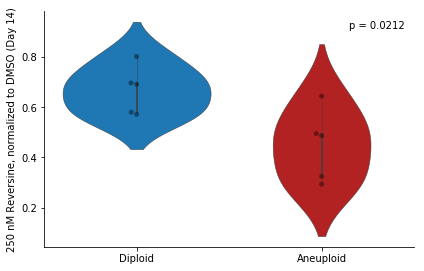

In [122]:
from scipy import stats
fig,ax = plt.subplots()
sns.violinplot(x=reversine14d.iloc[1:].loc[:,'Unnamed: 0'],y=reversine14d.iloc[1:].loc[:,'14d'].astype(float),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(x=reversine14d.iloc[1:].loc[:,'Unnamed: 0'],y=reversine14d.iloc[1:].loc[:,'14d'].astype(float),color='black',alpha=.4,order=my_order)

plt.xlabel('')

plotting.simpleaxis()



tt,p_val = stats.ttest_ind(reversine14d[reversine14d.loc[:,'Unnamed: 0'] == 'Aneuploid'].loc[:,'14d'].astype(float),reversine14d[reversine14d.loc[:,'Unnamed: 0'] == 'Diploid'].loc[:,'14d'].astype(float))
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)


plt.ylabel('250 nM Reversine, normalized to DMSO (Day 14)')

plotting.simpleaxis()
plt.tight_layout()

plt.savefig('14d.pdf')

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


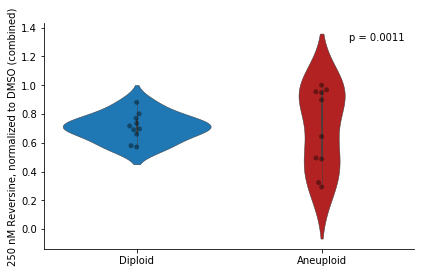

In [206]:
temp = reversine14d.copy()#.loc[:,['Unnamed: 0','72hr','14d']]

temp = temp.drop([0])
temp.index = temp.loc[:,'Unnamed: 0']

temp = pd.DataFrame(temp.loc[:,['72hr','14d']].unstack()).reset_index()

fig,ax = plt.subplots()
sns.violinplot(x=temp.loc[:,'Unnamed: 0'],y=temp.iloc[:,2].astype(float),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(x=temp.loc[:,'Unnamed: 0'],y=temp.iloc[:,2].astype(float),color='black',alpha=.4,order=my_order)

plt.xlabel('')

plotting.simpleaxis()


tt,p_val = stats.ttest_ind(reversine14d[reversine14d.loc[:,'Unnamed: 0'] == 'Aneuploid'].iloc[:,2].astype(float),reversine14d[reversine14d.loc[:,'Unnamed: 0'] == 'Diploid'].iloc[:,2].astype(float))
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)


plt.ylabel('250 nM Reversine, normalized to DMSO (combined)')

plotting.simpleaxis()
plt.tight_layout()

plt.savefig('combined_time.pdf')

In [207]:
temp.columns = ['time','ploidy','value']

In [208]:
temp.iloc[:,2] = temp.iloc[:,2].astype(float)

In [209]:
temp.loc[:,'time'] = temp.loc[:,'time'].astype(str)

In [210]:
temp.loc[:,'ploidy'] = temp.loc[:,'ploidy'].astype(str)

In [211]:
temp.index = temp.index.astype(str) 

In [212]:
temp

,time,ploidy,value
0,72hr,Aneuploid,0.954363
1,72hr,Aneuploid,0.968254
2,72hr,Aneuploid,0.949323
3,72hr,Aneuploid,1.000123
4,72hr,Aneuploid,0.897976
5,72hr,Diploid,0.734493
6,72hr,Diploid,0.881224
7,72hr,Diploid,0.659752
8,72hr,Diploid,0.716725
9,72hr,Diploid,0.770346


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

72hr_Aneuploid v.s. 72hr_Diploid: t-test independent samples, P_val=1.063e-03 stat=4.992e+00
14d_Aneuploid v.s. 14d_Diploid: t-test independent samples, P_val=2.116e-02 stat=-2.860e+00


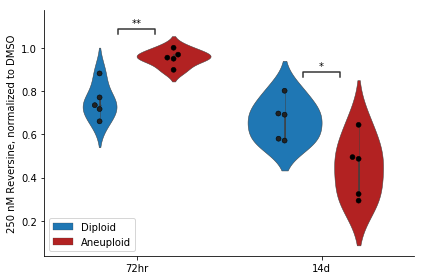

In [221]:
#sns.kdeplot(x=temp.loc[:,'Unnamed: 0'])
from statannot import add_stat_annotation
fig,ax = plt.subplots()
box_pairs = [
    (("72hr", "Diploid"), ("72hr", "Aneuploid")),
    (("14d", "Diploid"), ("14d", "Aneuploid"))]

sns.violinplot(x='time',y='value',hue = 'ploidy',data=temp,saturation=1,linewidth=.5,palette = my_pal,hue_order=['Diploid','Aneuploid'])

sns.swarmplot(x='time',y='value',hue = 'ploidy',data=temp,linewidth=.5,color='black',hue_order=['Diploid','Aneuploid'],dodge=True)




width = 0.4
add_stat_annotation(ax, data=temp, x='time', y='value', hue='ploidy', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2,order=['72hr','14d'])



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:2], labels=labels[0:2],loc='lower left')

plt.xlabel('')

plt.ylabel('250 nM Reversine, normalized to DMSO')
plotting.simpleaxis()

plt.tight_layout()
plt.savefig('reversine_combined2.pdf')


In [142]:
#EC50_PRISM

In [224]:
temp = ec50prism.iloc[2:,0:3]
temp.columns = temp.iloc[0]
temp = temp.drop([2])

temp.iloc[0:5,0] = 'Aneuploid'

temp.iloc[5:10,0] = 'Diploid'

In [225]:
temp.columns = ['ploidy','line','value']

In [226]:
temp = temp.dropna()


No handles with labels found to put in legend.


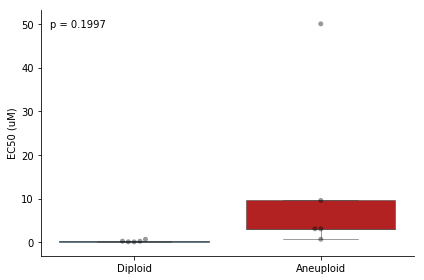

In [242]:
fig,ax = plt.subplots()
sns.boxplot(x=temp.loc[:,'ploidy'],y=temp.loc[:,'value'].astype(float),saturation=1,linewidth=.5,order=my_order,palette = my_pal,fliersize=0)
sns.swarmplot(x=temp.loc[:,'ploidy'],y=temp.loc[:,'value'].astype(float),color='black',alpha=.4,order=my_order)

plt.xlabel('')

plotting.simpleaxis()


tt,p_val = stats.ttest_ind(temp[temp.loc[:,'ploidy'] == 'Aneuploid'].loc[:,'value'].astype(float),temp[temp.loc[:,'ploidy'] == 'Diploid'].loc[:,'value'].astype(float))
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False,loc='upper left')


plt.ylabel('EC50 (uM)')

plotting.simpleaxis()
plt.tight_layout()
#plt.ylim(3,3.5)

plt.savefig('ec50_prism_box.pdf')

In [196]:
temp = ec50bort.iloc[2:,0:3]
temp.iloc[0:5,0] = 'Aneuploid'
temp.iloc[5:,0] = 'Diploid'

In [197]:
temp.columns = ['ploidy','line','value']

/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


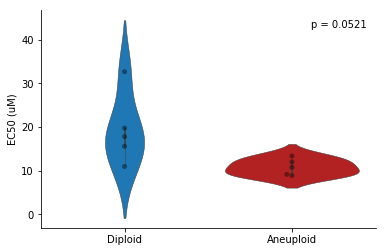

In [199]:
fig,ax = plt.subplots()
sns.violinplot(x=temp.loc[:,'ploidy'],y=temp.loc[:,'value'].astype(float),saturation=1,linewidth=.5,order=my_order,palette = my_pal)
sns.swarmplot(x=temp.loc[:,'ploidy'],y=temp.loc[:,'value'].astype(float),color='black',alpha=.4,order=my_order)

plt.xlabel('')

plotting.simpleaxis()


tt,p_val = stats.ttest_ind(temp[temp.loc[:,'ploidy'] == 'Aneuploid'].loc[:,'value'].astype(float),temp[temp.loc[:,'ploidy'] == 'Diploid'].loc[:,'value'].astype(float))
ax.legend(title='p = '+ str(round(p_val,4)),frameon=False)


plt.ylabel('EC50 (uM)')
plt.savefig('ec50_bort.pdf')

In [251]:
# sirna plot

temp = sirna72hr.iloc[:,[1,15,16,17]]
temp.iloc[0:5,0] = 'Aneuploid'
temp.iloc[5:,0] = 'Diploid'

temp = temp.dropna()

# bub1b

#sns.violinplot(x='time',y='value',hue = 'ploidy',data=temp,saturation=1,linewidth=.5,palette = my_pal,hue_order=['Diploid','Aneuploid'])



/Users/mkazachk/miniconda3/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [295]:
a = temp.iloc[:,[0,1]]
b = temp.iloc[:,[0,2]]
c = temp.iloc[:,[0,3]]

a.index = a.loc[:,'Unnamed: 1']
a = pd.DataFrame(a.loc[:,'siRNA-BUB1B.1'])
a['gene'] = 'BUB1B'
a.columns = ['value','gene']



b.index = b.loc[:,'Unnamed: 1']
b = pd.DataFrame(b.loc[:,'siRNA-MAD2.1'])
b['gene'] = 'MAD2'
b.columns = ['value','gene']

c.index = c.loc[:,'Unnamed: 1']
c = pd.DataFrame(c.loc[:,'siRNA-TTK.1'])
c['gene'] = 'TTK'
c.columns = ['value','gene']

In [308]:
full = pd.concat([pd.concat([a,b]),c])
full = full.reset_index()


/Users/mkazachk/miniconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

BUB1B_Aneuploid v.s. BUB1B_Diploid: t-test independent samples, P_val=1.046e-02 stat=3.986e+00
MAD2_Aneuploid v.s. MAD2_Diploid: t-test independent samples, P_val=1.579e-02 stat=3.585e+00
TTK_Aneuploid v.s. TTK_Diploid: t-test independent samples, P_val=1.445e-02 stat=3.670e+00


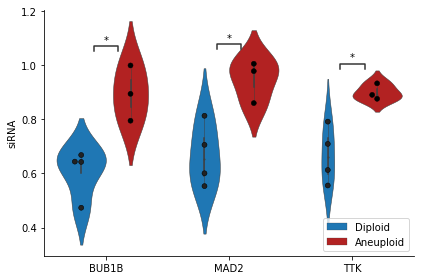

In [314]:




fig,ax = plt.subplots()
box_pairs = [
    (("BUB1B", "Diploid"), ("BUB1B", "Aneuploid")),
    (("MAD2", "Diploid"), ("MAD2", "Aneuploid")),
    (("TTK", "Diploid"), ("TTK", "Aneuploid"))]

sns.violinplot(x='gene',y='value',hue = 'Unnamed: 1',data=full,saturation=1,linewidth=.5,palette = my_pal,hue_order=['Diploid','Aneuploid'])

sns.swarmplot(x='gene',y='value',hue = 'Unnamed: 1',data=full,linewidth=.5,color='black',hue_order=['Diploid','Aneuploid'],dodge=True)



width = 0.4
add_stat_annotation(ax, data=full, x='gene', y='value', hue='Unnamed: 1', width=width,
                    box_pairs=box_pairs, test='t-test_ind', loc='inside', verbose=2)



handles, labels = ax.get_legend_handles_labels()

ax.legend(handles=handles[0:2], labels=labels[0:2],loc='lower right')


plt.xlabel('')
plt.ylabel('siRNA')
plotting.simpleaxis()

plt.tight_layout()

plt.savefig('sirna.pdf')
